<a href="https://colab.research.google.com/github/zelestik/Big-open-data-labs/blob/main/%D0%9B%D0%A04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


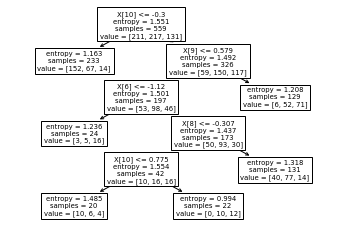

Оценка качества классификатора
0.5614973262032086
Вариант использования 1
5
Вариант использования 2
Аномалия


In [ ]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# (Задание 2) Функция проверяющая значения признаков классифицируемого объекта 
# на соответствие областям допустимых значений признаков и выявляющую аномальные объекты.
def check(df):
  i = 0
  for col in df:
    for cell in col:
      if (cell > 3 or cell < -3):
        return False
  return True

# Метод для предсказания метки по полученному объекту
# Перед предсказанием данный метод стандартизирует данные и проверяет их на выбросы
def predict(data):
  req = pd.DataFrame(data)
  req = ss.transform(req)
  # Проверяем вхождение введённых данных в доверительный интервал
  if check(req):
    # Предсказываем метку для введённых данных
    prediction = dt.predict(req)[0]
    print(prediction)
  else:
    print("Аномалия")

df = pd.read_csv('2.0DataSet.csv', delimiter=";")
# Списки мат ожидания и среднеквадратического отклонения для столбцов
mList = []
sList = []
# Исклчение выбросов
for col in df:
  mList.append(np.median(df[col]))
  sList.append(np.std(df[col]))
  for num in df[col]:
    if (num > (mList[len(mList)-1] + 3* sList[len(sList)-1])) or (num < (mList[len(mList)-1] - 3* sList[len(sList)-1])):
      num = np.NaN
# Исключение строк с пустыми значениями
df.dropna()
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['quality'], test_size=0.25, random_state=0)
# Стандартизация данных (Задание 1)
ss = StandardScaler()
ss.fit(x_train)
x_train.iloc[:, :] = ss.transform(x_train)
x_test.iloc[:, :] = ss.transform(x_test)
# Создание и тренировка классификатора (Задание 1)
dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=40, min_impurity_split=1.4)
dt.fit(x_train, y_train)
plt.figure()
tree.plot_tree(dt)
plt.savefig('decision-tree.pdf') 
plt.show()
# Предсказание для тестовых значений
prediction = dt.predict(x_test)
# print(x_test.assign(predict=prediction))
# Оценка качества классификатора (Задание 1)
print("Оценка качества классификатора")
print(format(dt.score(x_test, y_test)))

# Варианты использования классификатора (Задание 3)
# Вариант 1. Обычные данные.
data = {'fixed acidity': [7],
        'volatile acidity': [0.42],
        'citric acid': [0.21],
        'residual sugar': [2.5],
        'chlorides': [0.092],
        'free sulfur dioxide': [33],
        'total sulfur dioxide': [88],
        'density': [0.99823],
        'pH': [3.19],
        'sulphates': [0.52],
        'alcohol': [9.2]}

# Вариант 2. Данные, выходящие за пределы доверительного интервала.
data_anomal = {'fixed acidity': [50],
        'volatile acidity': [0.42],
        'citric acid': [0.21],
        'residual sugar': [2.5],
        'chlorides': [0.092],
        'free sulfur dioxide': [33],
        'total sulfur dioxide': [88],
        'density': [0.99823],
        'pH': [3.19],
        'sulphates': [0.52],
        'alcohol': [9.2]}

print("Вариант использования 1")
predict(data)
print("Вариант использования 2")
predict(data_anomal)